In [1]:
%matplotlib inline

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from tensorflow._api.v1 import keras

In [4]:
from keras_retinanet import models

In [5]:
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image

In [6]:
from keras_retinanet.utils.visualization import draw_box, draw_caption

In [7]:
from keras_retinanet.utils.colors import label_color

In [8]:
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
import time

In [9]:
import tensorflow as tf

In [10]:
def get_session():
    config = tf.ConfigProto()
    config.gpu_options.allow_growth = True
    return tf.Session(config=config)

In [11]:
os.environ["CUDA_VISIBLE_DEVICES"] = "3"

In [12]:
keras.backend.set_session(get_session())

In [13]:
model_path = './snapshots/run002/resnet50_csv_99.h5'

In [14]:
model = models.load_model(model_path, backbone_name='resnet50')

In [15]:
model = models.convert_model(model)

In [17]:
print(model.summary())

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
padding_conv1 (ZeroPadding2D)   (None, None, None, 3 0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, None, None, 6 9408        padding_conv1[0][0]              
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, None, None, 6 256         conv1[0][0]                      
__________________________________________________________________________________________________
conv1_relu

In [16]:
labels_to_names = {0: 'MC'}

In [96]:
image = read_image_bgr('./data/imgs.test/00062_ir_wv_slp.png')

In [97]:
draw = image.copy()
draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

In [98]:
image = preprocess_image(image)
image, scale = resize_image(image, max_side=2048)

start = time.time()
boxes, scores, labels = model.predict_on_batch(np.expand_dims(image, axis=0))
print("processing time: ", time.time() - start)

boxes /= scale

processing time:  0.035384178161621094


In [99]:
for box, score, label in zip(boxes[0], scores[0], labels[0]):
    # scores are sorted so we can break
    if score < 0.5:
        break
        
    b = box.astype(int)
    draw_box(draw, b, color=(0,255,0))
    
    caption = '%.3f' % (score)
#     draw_caption(draw, b, caption)
    b = np.array(b).astype(int)
    if b[1] - 10 < 0:
        cv2.putText(draw, caption, (b[0], b[3] + 40), cv2.FONT_HERSHEY_TRIPLEX, 2, (255, 200, 255), 3)
    else:
        cv2.putText(draw, caption, (b[0], b[1] - 10), cv2.FONT_HERSHEY_TRIPLEX, 2, (255, 200, 255), 3)
#     cv2.putText(draw, caption, (b[0], b[1] - 10), cv2.FONT_HERSHEY_TRIPLEX, 3, (255, 255, 255), 1)

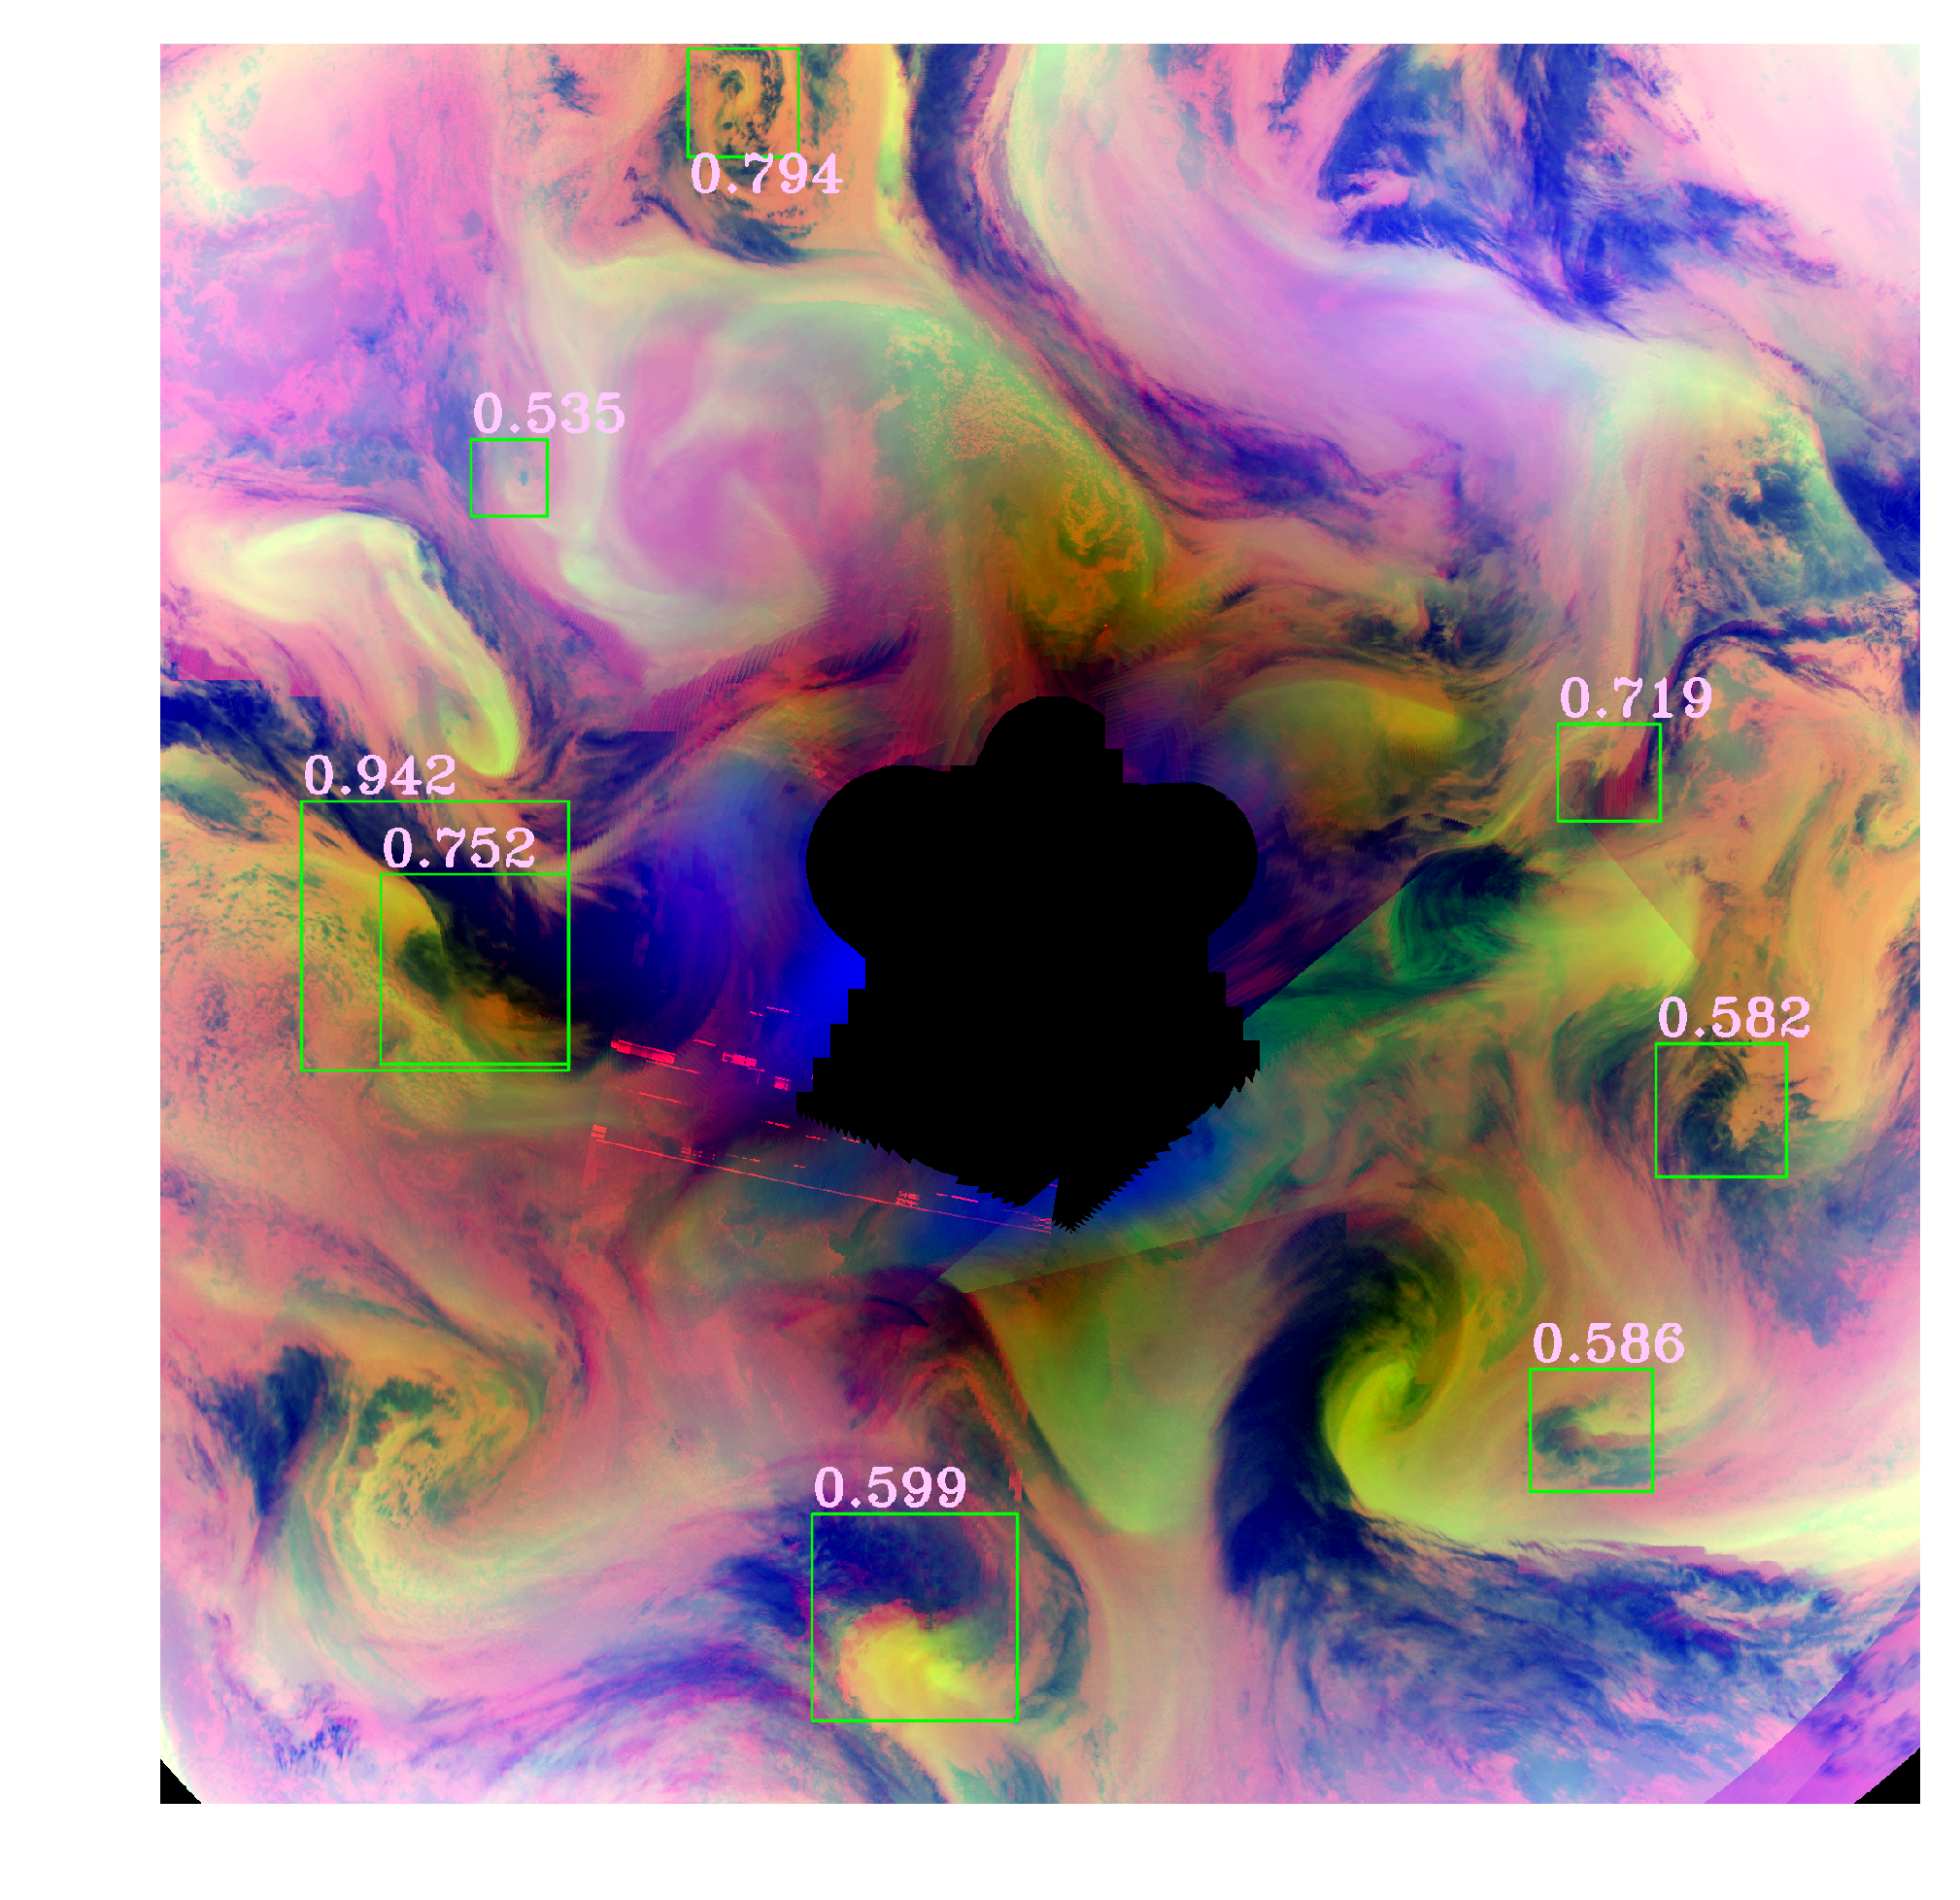

In [100]:
plt.figure(figsize=(8, 8), dpi=300)
plt.axis('off')
plt.imshow(draw)